## Analysis of  StarTracker Pointing and Tracking Test - Slew and Settle - TMA Tracking Jitter Validation

(Analysis of serpent walk with random offsets)

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# function to read in the metadata that has been downloaded
def read_rubintv(fname):
    df = pd.read_json(fname).T
    df = df.dropna()
    df['seq_num'] = df.index
    
    return df.reset_index()


In [70]:
# read in dataframe
fname = 'startracker_2023-03-09 (8).json'
df = read_rubintv(fname)

In [71]:
df

,index,Exposure Time wide,MJD wide,Ra wide,Dec wide,Alt wide,Az wide,UTC wide,Exposure Time,MJD,...,Calculated Alt wide,Calculated Az wide,Delta Ra Arcsec wide,Delta Dec Arcsec wide,Delta Alt Arcsec wide,Delta Az Arcsec wide,Delta Rot Arcsec wide,RMS scatter arcsec wide,RMS scatter pixels wide,seq_num
0,2,5,60013.006804,147.584927,-20.755174,45.438896,89.573966,00:09:47,4,60013.006798,...,45.251815,89.878287,-2.709905,-59.325366,-673.488731,1095.555919,1050383.586445,4.412145,0.509349,2
1,5,5,60013.00713,147.58499,-20.755174,45.54059,89.513847,00:10:16,4,60013.007125,...,45.353503,89.818702,-2.533244,-59.268129,-673.513094,1097.478513,1050382.163924,4.406446,0.508694,5
2,6,5,60013.007241,147.585035,-20.755209,45.575238,89.49339,00:10:25,4,60013.007235,...,45.387917,89.798604,-2.272147,-59.337748,-674.354962,1098.767723,1050380.622954,4.435253,0.51202,6
3,7,5,60013.007349,147.585093,-20.755174,45.608984,89.473347,00:10:34,4,60013.007344,...,45.421771,89.778802,-2.399532,-59.612528,-673.967859,1099.639064,1050380.032883,4.417225,0.509938,7
4,8,5,60013.007459,147.585099,-20.755174,45.643181,89.453082,00:10:44,4,60013.007453,...,45.455934,89.758701,-2.232958,-59.515211,-674.091351,1100.229944,1050379.682859,4.396507,0.507552,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1794,5,60013.341335,286.946784,-40.029897,35.148083,119.955272,08:11:31,4,60013.341329,...,35.150446,119.976676,28.794702,-59.257096,8.503464,77.053017,1087481.983341,4.571916,0.527515,1794
1763,1795,5,60013.341657,299.482152,-37.240831,25.06385,119.968851,08:11:59,4,60013.341651,...,25.076442,119.988094,-1.838682,-67.940286,45.332494,69.275972,1059506.896191,8.415523,0.971061,1795
1764,1796,5,60013.341759,299.482205,-37.240776,25.091362,119.957704,08:12:07,4,60013.341753,...,25.104009,119.976904,-1.841248,-67.890959,45.530605,69.120542,1059572.07098,8.302773,0.958069,1796
1765,1797,5,60013.341861,299.482056,-37.240829,25.119192,119.94655,08:12:16,4,60013.341856,...,25.131669,119.96578,-1.214643,-67.748997,44.917572,69.22853,1059632.675741,8.239899,0.950826,1797


In [75]:

# this is from our first attempt at the snake test - RA and Dec are wrong, as will be shown
first_attempt_circle = df[600:646].reset_index() # this is the initial attempt, with different numbers of observations

In [90]:
print(('Positions for ' + str(first_attempt_circle.seq_num.iloc[0]) + ' to ' + str(first_attempt_circle.seq_num.iloc[-1])))

Positions for 621 to 668


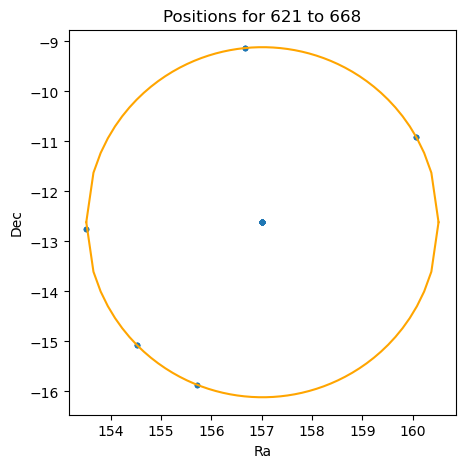

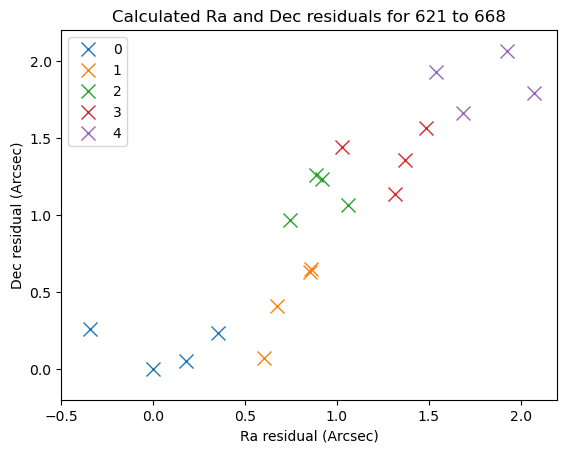

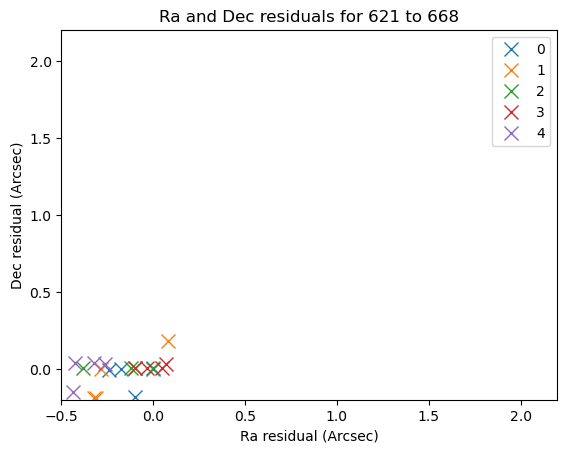

In [93]:
# this is not the ra and dec we want
plt.figure(figsize = (5, 5))
plt.plot(first_attempt_circle['Calculated Ra wide'], first_attempt_circle['Calculated Dec wide'], '.')

base_ra = first_attempt_circle['Calculated Ra wide'].iloc[0]
base_dec = first_attempt_circle['Calculated Dec wide'].iloc[0]

ra_circ = np.linspace(-3.5, 3.5)

plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - ra_circ**2), color = 'orange')
plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - ra_circ**2), color = 'orange')


plt.xlabel('Ra')
plt.ylabel('Dec')
plt.title(('Positions for ' + str(first_attempt_circle.seq_num.iloc[0]) + ' to ' + str(first_attempt_circle.seq_num.iloc[-1])))

plt.show()

# this plot is for the first run, where there were different numbers of images taken at each location
# it plots the center 

counter = 0
center_time = 0

for i in range(len(first_attempt_circle['Calculated Ra wide'])):
    if counter == 0:
        ra = []
        dec = []
    if (first_attempt_circle['Calculated Ra wide'][i] < base_ra + 0.5) and (first_attempt_circle['Calculated Ra wide'][i] > base_ra - 0.5) and \
    (first_attempt_circle['Calculated Dec wide'][i] < base_dec + 0.5) and (first_attempt_circle['Calculated Dec wide'][i] > base_dec - 0.5):
        ra.append(first_attempt_circle['Calculated Ra wide'][i])
        dec.append(first_attempt_circle['Calculated Dec wide'][i])
        counter += 1
    else:
        if counter > 0:
            plt.plot((np.array(ra) - base_ra)*3600 * np.cos(base_dec * np.pi/180), (np.array(dec) - base_dec)*3600, 'x', label = str(center_time), markersize = 10)
            counter = 0
            center_time +=1
        

plt.xlabel('Ra residual (Arcsec)')
plt.ylabel('Dec residual (Arcsec)')
plt.title(('Calculated Ra and Dec residuals for ' + str(first_attempt_circle.seq_num.iloc[0]) + ' to ' + str(first_attempt_circle.seq_num.iloc[-1])))
plt.xlim([-0.5, 2.2])
plt.ylim([-0.2, 2.2])
plt.legend()
plt.show()

counter = 0
center_time = 0

base_ra = first_attempt_circle['Ra wide'][0]
base_dec = first_attempt_circle['Dec wide'][0]


for i in range(len(first_attempt_circle['Ra wide'])):
    if counter == 0:
        ra = []
        dec = []
    if (first_attempt_circle['Ra wide'][i] < base_ra + 0.5) and (first_attempt_circle['Ra wide'][i] > base_ra - 0.5) and \
    (first_attempt_circle['Dec wide'][i] < base_dec + 0.5) and (first_attempt_circle['Dec wide'][i] > base_dec - 0.5):
        ra.append(first_attempt_circle['Ra wide'][i])
        dec.append(first_attempt_circle['Dec wide'][i])
        counter += 1
    else:
        if counter > 0:
            plt.plot((np.array(ra) - base_ra)*3600 * np.cos(base_dec * np.pi/180), (np.array(dec) - base_dec)*3600, 'x', label = str(center_time), markersize = 10)
            counter = 0
            center_time +=1
        

plt.xlabel('Ra residual (Arcsec)')
plt.ylabel('Dec residual (Arcsec)')
plt.title(('Ra and Dec residuals for ' + str(first_attempt_circle.seq_num.iloc[0]) + ' to ' + str(first_attempt_circle.seq_num.iloc[-1])))
plt.xlim([-0.5, 2.2])
plt.ylim([-0.2, 2.2])
plt.legend()
plt.show()

In [94]:
def plot_snakes(data):
    # this assumes that exactly 3 images were taken at each position, and 5 there were 5 offsets before returning to center and then moving to a new position
    # plt.figure(figsize = (5, 5))
    plt.plot(data['Calculated Ra wide'], data['Calculated Dec wide'], '.')

    base_ra = data['Calculated Ra wide'][0]
    base_dec = data['Calculated Dec wide'][0]

    ra_circ = np.linspace(-3.5 / np.cos(base_dec * np.pi/180), 3.5 / np.cos(base_dec * np.pi/180))

    plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')
    plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')

    plt.title(('Positions for ' + str(data.seq_num.iloc[0]) + ' to ' + str(data.seq_num.iloc[-1])))
    plt.xlabel('Ra')
    plt.ylabel('Dec')
    
    plt.show()

    # this plot is for the first run, where there were different numbers of images taken at each location
    # it plots the center 

    counter = 0
    center_time = 0

    for i in range(len(data['Calculated Ra wide'])):
        if counter == 0:
            ra = []
            dec = []
        if (data['Calculated Ra wide'][i] < base_ra + 0.5) and (data['Calculated Ra wide'][i] > base_ra - 0.5) and \
        (data['Calculated Dec wide'][i] < base_dec + 0.5) and (data['Calculated Dec wide'][i] > base_dec - 0.5):
            ra.append(data['Calculated Ra wide'][i])
            dec.append(data['Calculated Dec wide'][i])
            counter += 1
        else:
            if counter > 0:
                plt.plot((np.array(ra) - base_ra)*3600 * np.cos(base_dec * np.pi/180), (np.array(dec) - base_dec)*3600, 'x', label = str(center_time), markersize = 10)
                counter = 0
                center_time +=1
        

    plt.xlabel('Ra residual (Arcsec)')
    plt.ylabel('Dec residual (Arcsec)')
    plt.title(('Calculated Ra and Dec residuals for ' + str(data.seq_num.iloc[0]) + ' to ' + str(data.seq_num.iloc[-1])))
    # plt.xlim([-0.5, 2.2])
    # plt.ylim([-0.2, 2.2])
    plt.legend()
    plt.show()

    counter = 0
    center_time = 0

    base_ra = data['Ra wide'][0]
    base_dec = data['Dec wide'][0]


    for i in range(len(data['Ra wide'])):
        if counter == 0:
            ra = []
            dec = []
        if (data['Ra wide'][i] < base_ra + 0.5) and (data['Ra wide'][i] > base_ra - 0.5) and \
        (data['Dec wide'][i] < base_dec + 0.5) and (data['Dec wide'][i] > base_dec - 0.5):
            ra.append(data['Ra wide'][i])
            dec.append(data['Dec wide'][i])
            counter += 1
        else:
            if counter > 0:
                plt.plot((np.array(ra) - base_ra)*3600 * np.cos(base_dec * np.pi/180), (np.array(dec) - base_dec)*3600, 'x', label = str(center_time), markersize = 10)
                counter = 0
                center_time +=1
        

    plt.xlabel('Ra residual (Arcsec)')
    plt.ylabel('Dec residual (Arcsec)')
    plt.title(('Ra and Dec residuals for ' + str(data.seq_num.iloc[0]) + ' to ' + str(data.seq_num.iloc[-1])))
    # plt.xlim([-0.5, 2.2])
    # plt.ylim([-0.2, 2.2])
    plt.legend()
    plt.show()

In [101]:
# 669 to 968 - ra and dec are circles not on a sphere, so we didn't shift the correct amount, but analyzing anyway
# these also do exactly 3 and then move
# 02:45:05 to 03:54:31

circle_correct_3 = df[646:946]

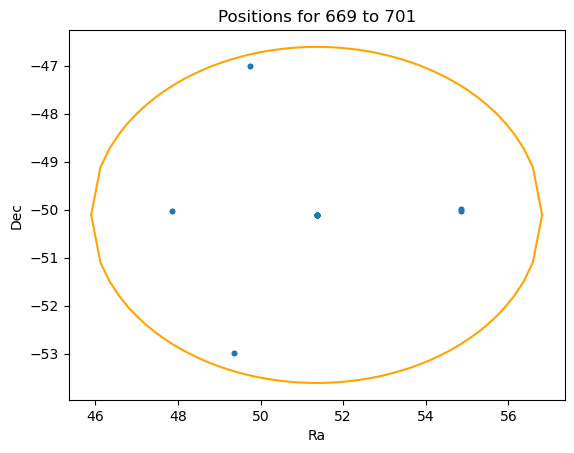

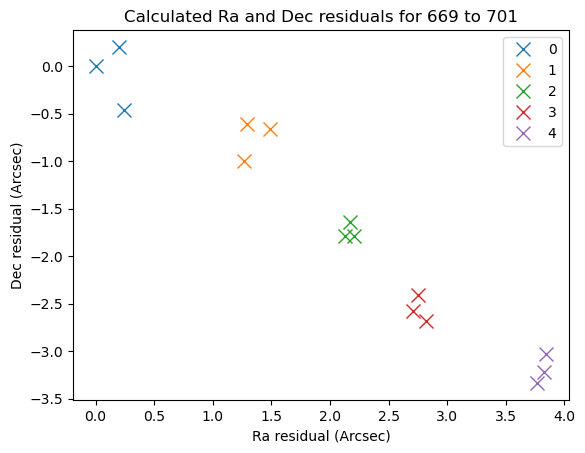

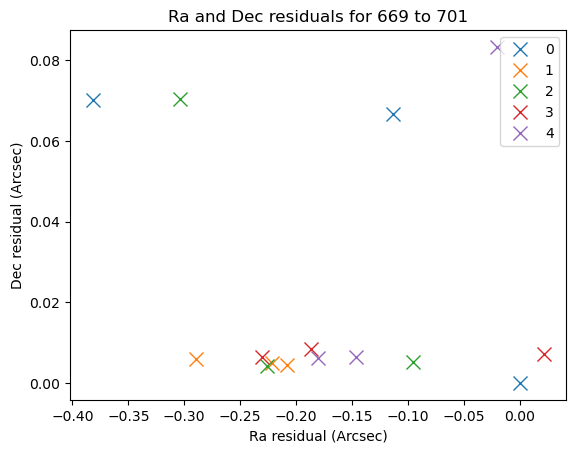

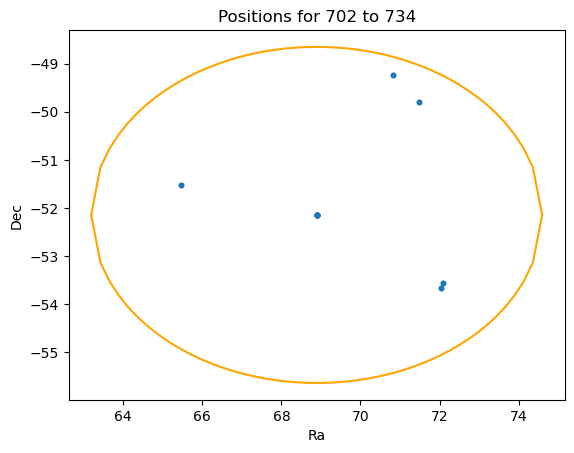

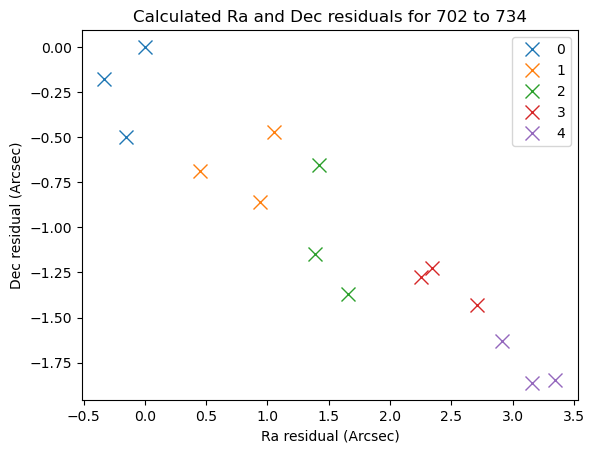

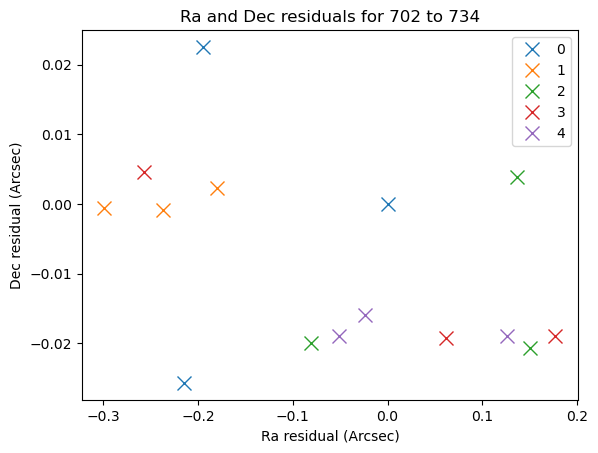

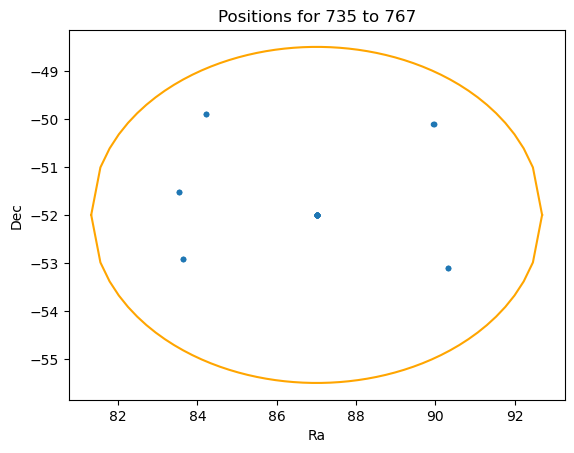

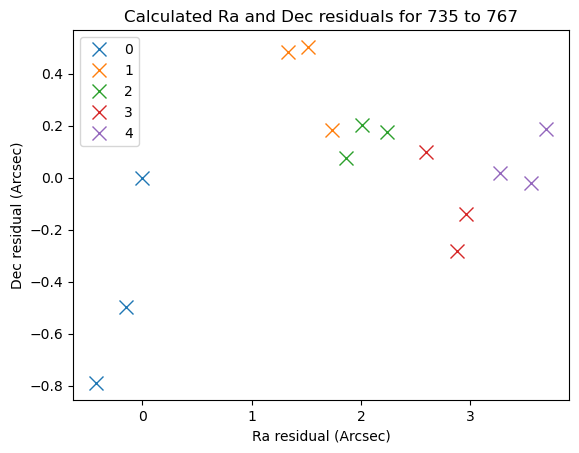

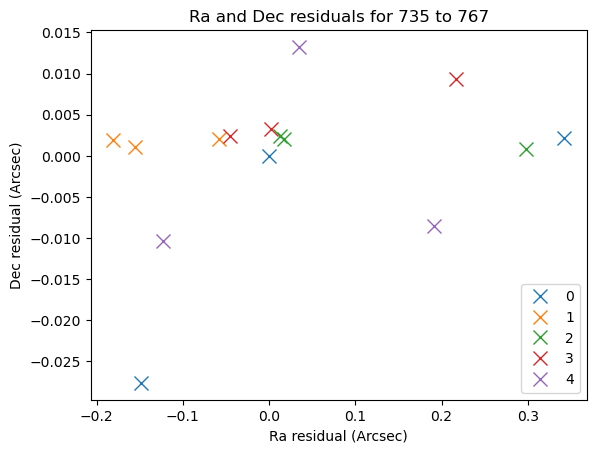

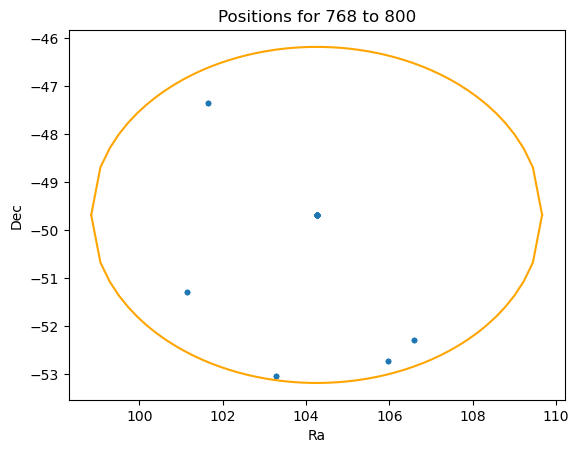

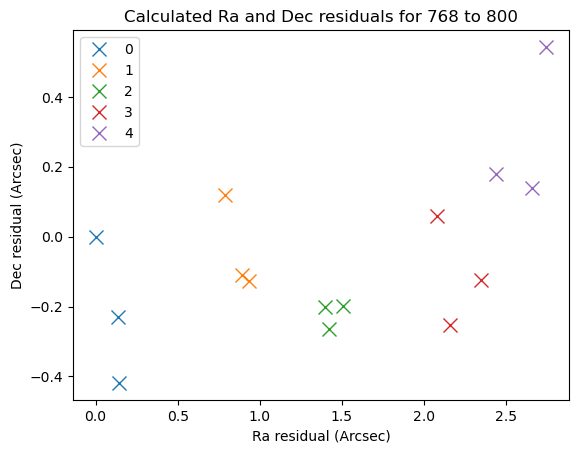

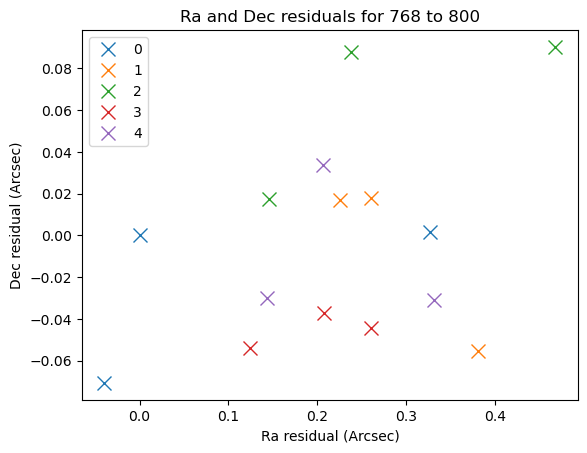

/tmp/ipykernel_699/3838733248.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')
/tmp/ipykernel_699/3838733248.py:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')


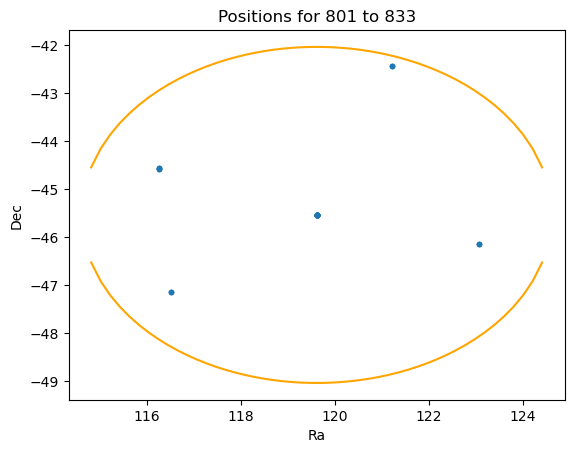

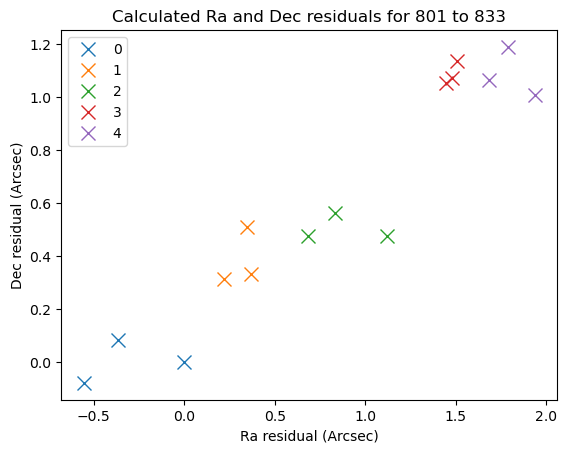

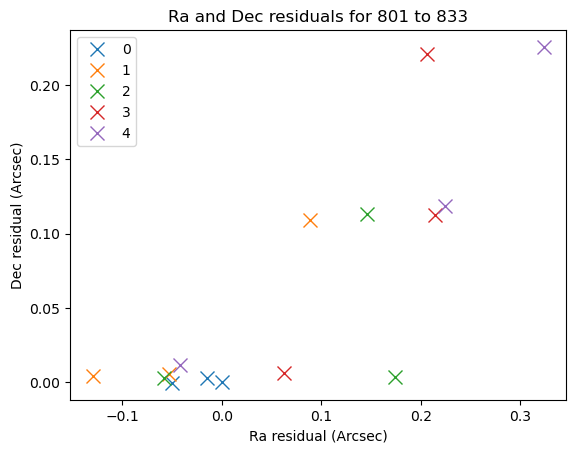

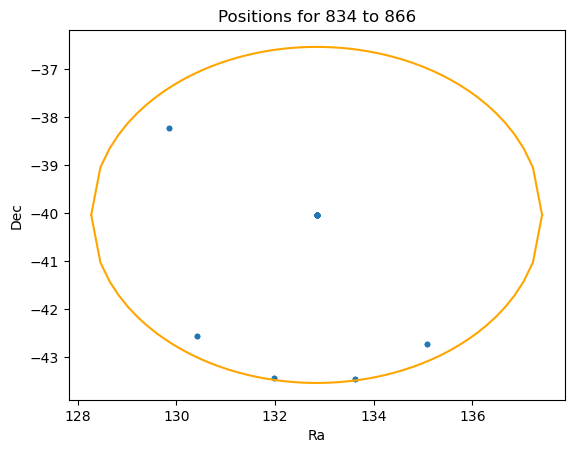

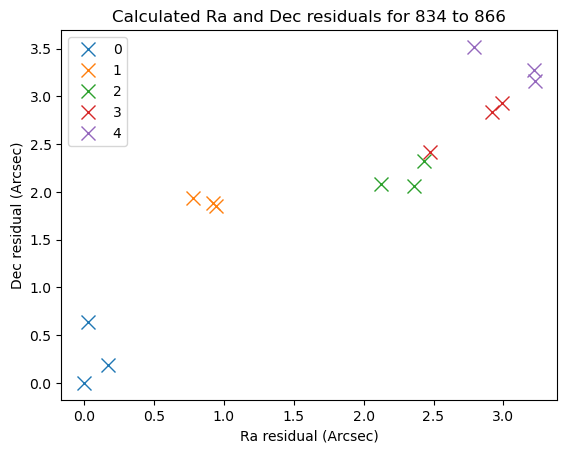

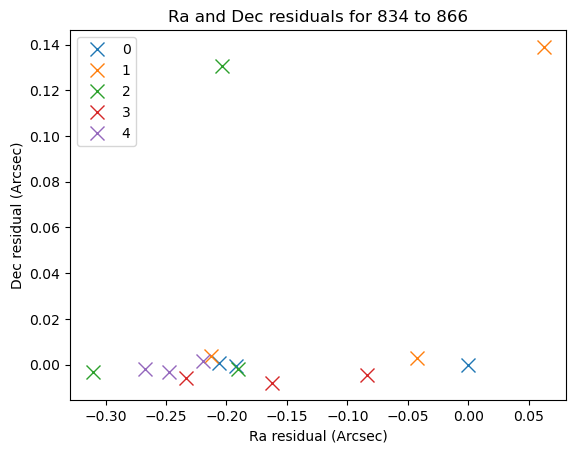

/tmp/ipykernel_699/3838733248.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')
/tmp/ipykernel_699/3838733248.py:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')


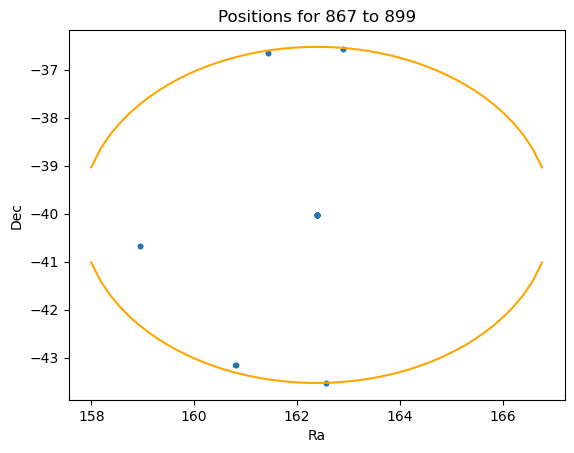

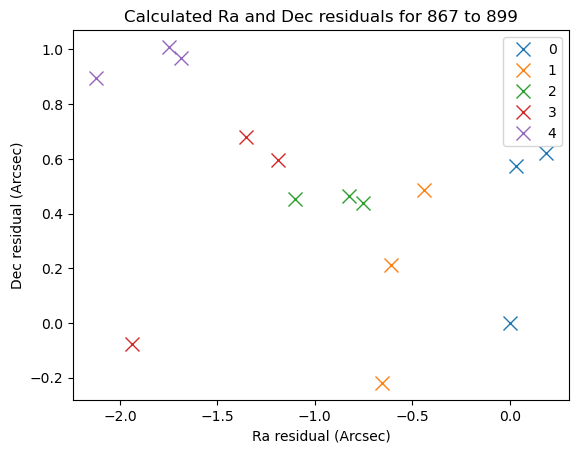

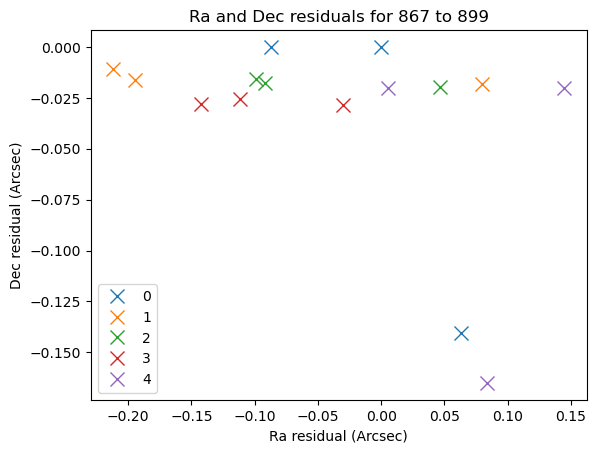

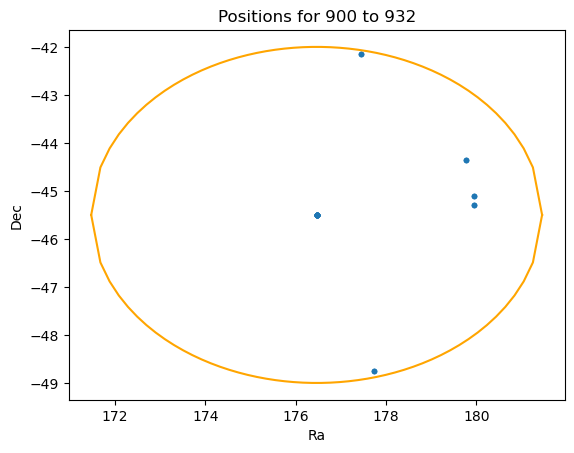

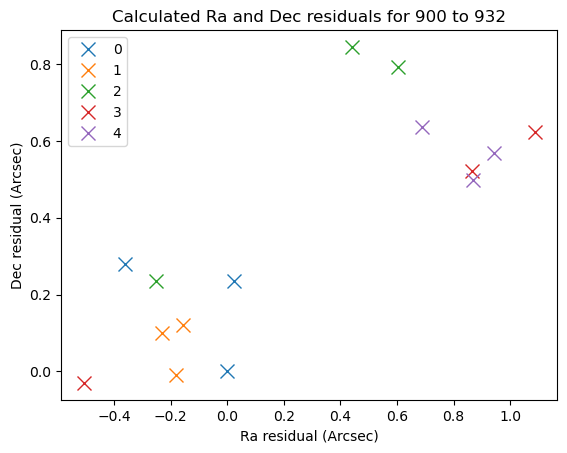

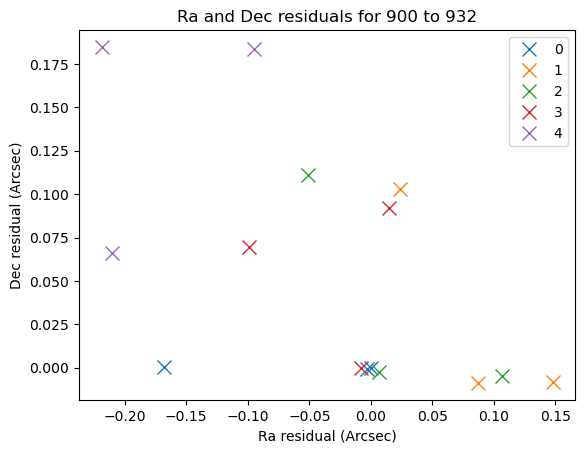

/tmp/ipykernel_699/3838733248.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')
/tmp/ipykernel_699/3838733248.py:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - (ra_circ* np.cos(base_dec * np.pi/180))**2), color = 'orange')


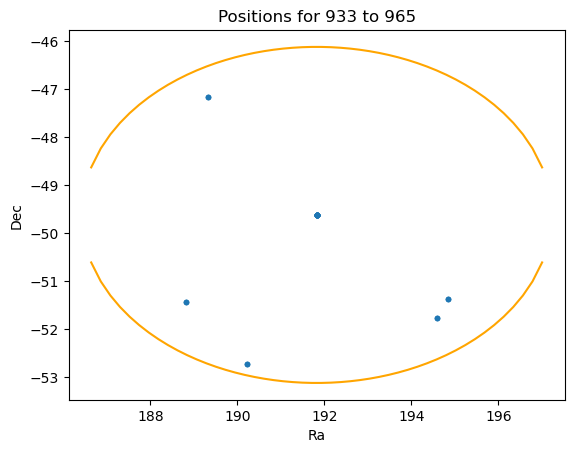

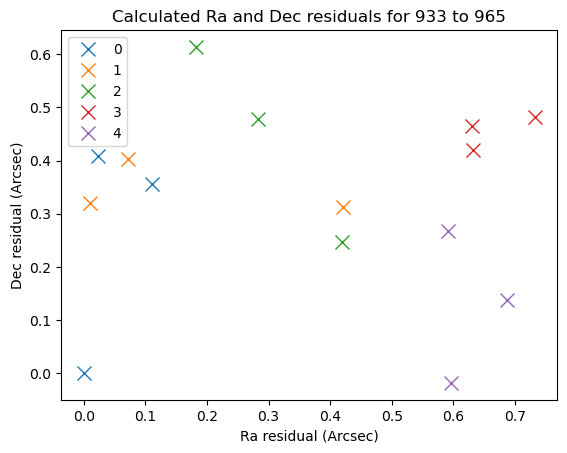

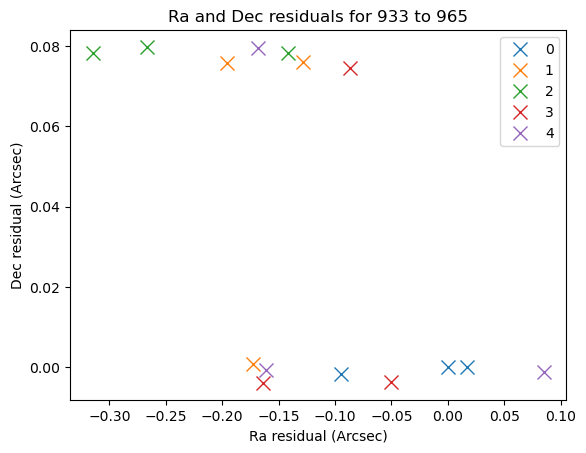

In [102]:
for i in range(int(len(circle_correct_3)/33)):
    plot_snakes(circle_correct_3[i*33:(i+1)*33].reset_index())

In [103]:
#now we want 972 to 1004 - 04:01:56 to 04:10:22 - has correct ra and dec

first_ra_dec_corr = df[949:982]

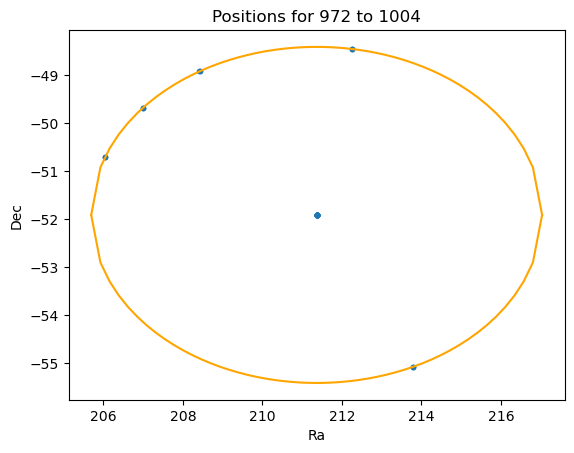

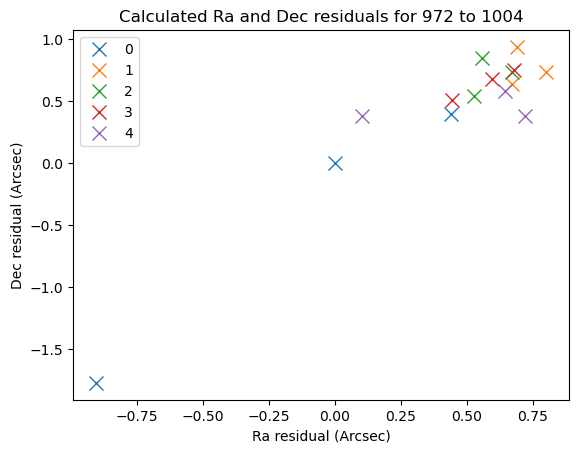

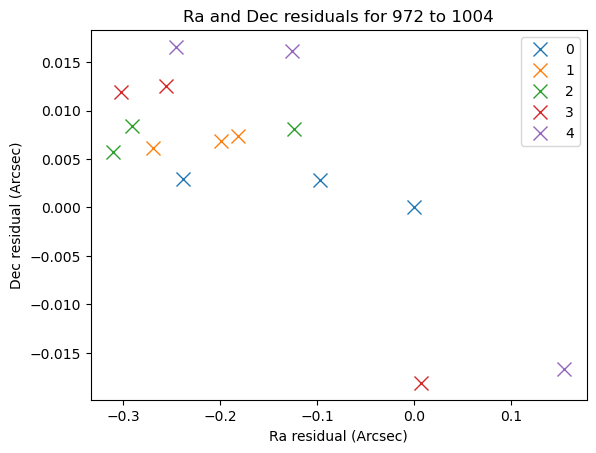

In [104]:
plot_snakes(first_ra_dec_corr.reset_index())

In [105]:
# continuing with sequences 1006 to 1137, 04:13:03 to 04:45:04

ra_dec_corr_2 = df[983:1115]

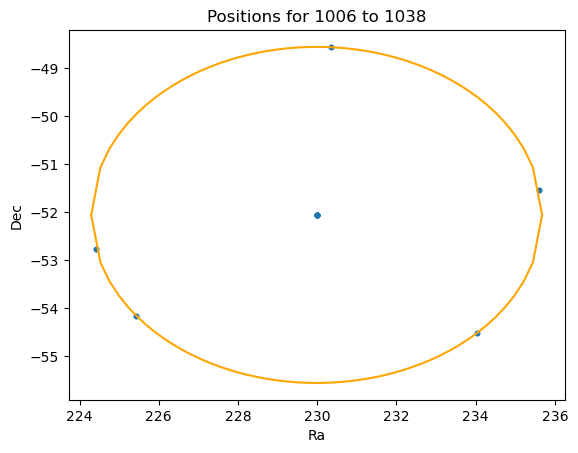

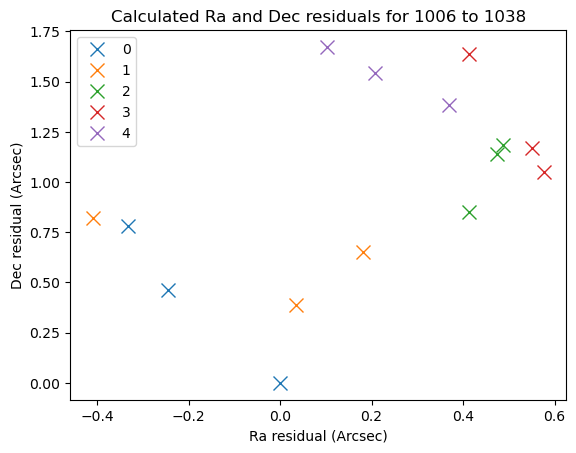

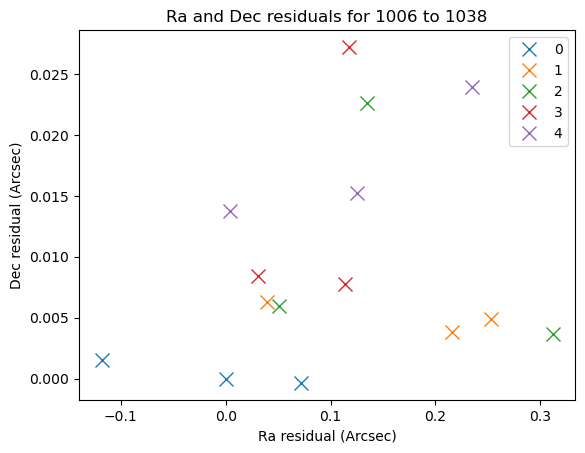

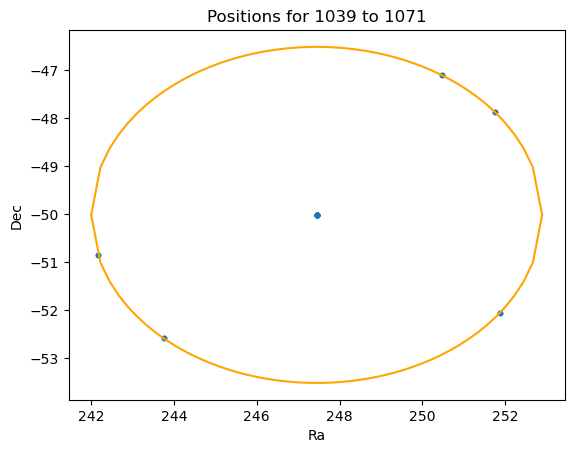

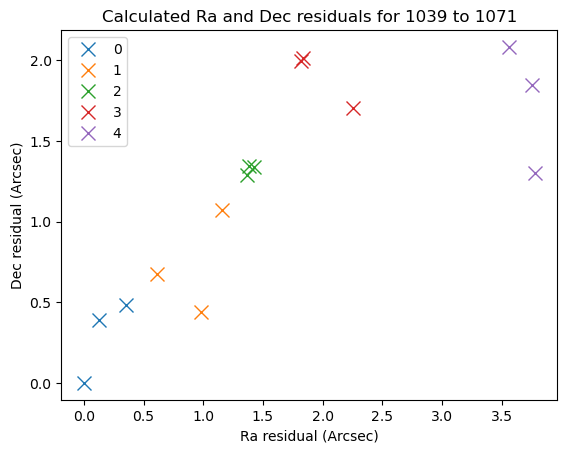

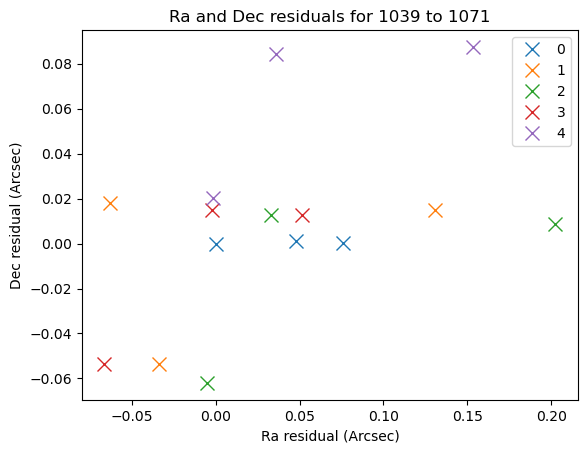

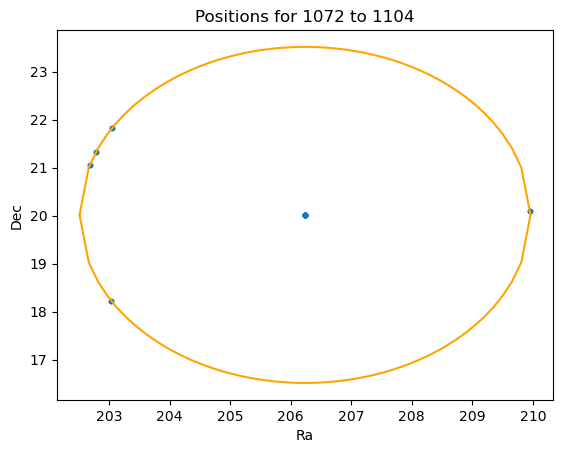

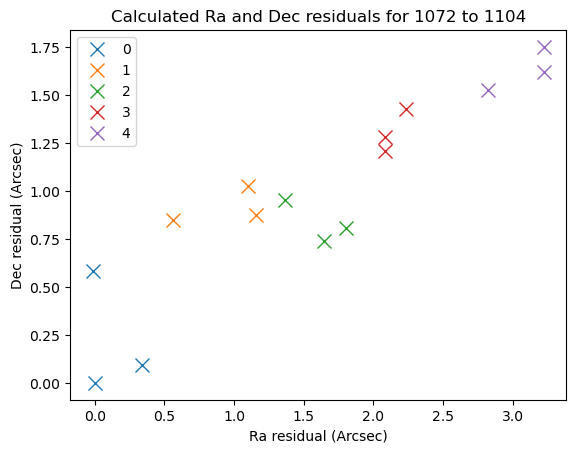

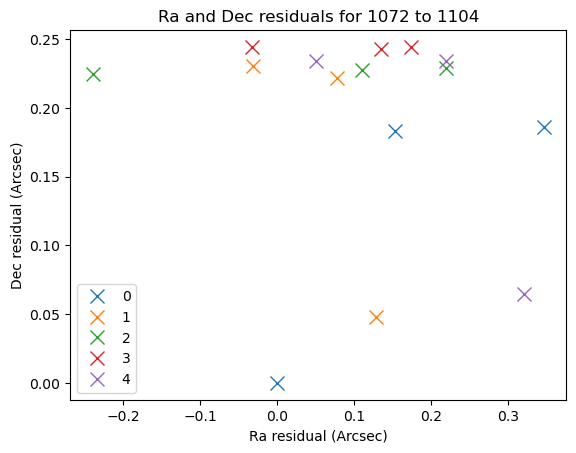

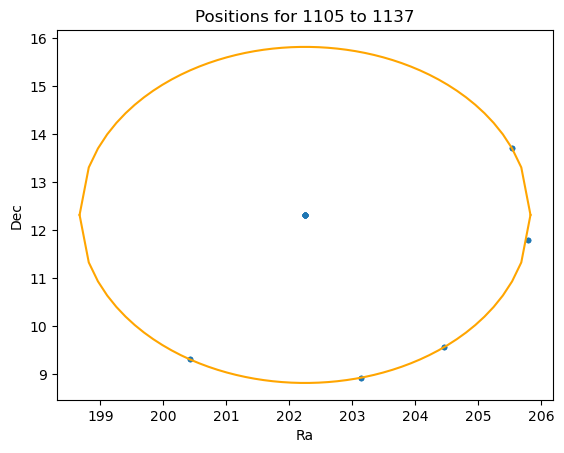

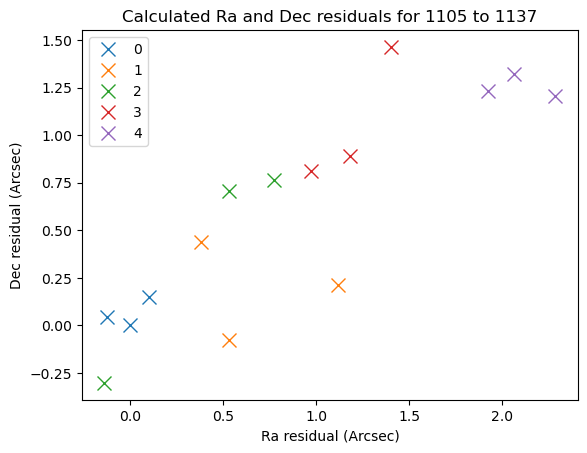

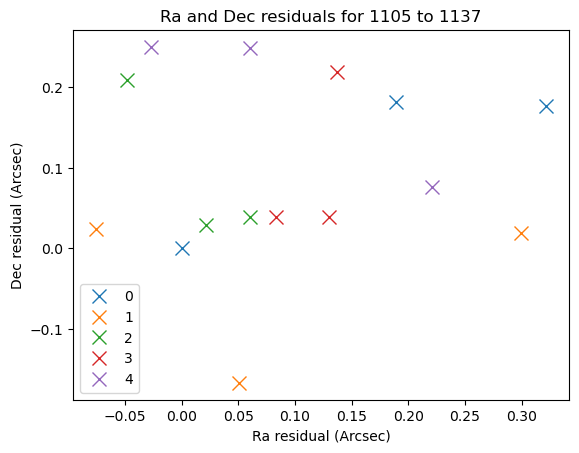

In [106]:
for i in range(int(len(ra_dec_corr_2)/33)):
    plot_snakes(ra_dec_corr_2[i*33:(i+1)*33].reset_index())

## Testing uniform distributon options for an ellipse

The first is uniform, the second is not

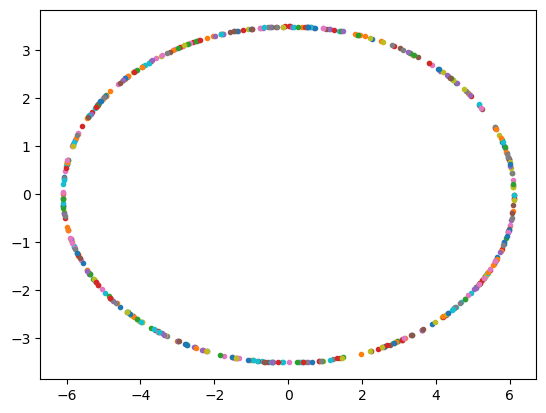

In [101]:
offset_size = 3.5
for i in range(500):
    random_angle = 2 * np.pi * np.random.rand()
    offset_dec = offset_size * np.cos(random_angle)
    sign = 1 if np.random.rand() < 0.5 else -1
    offset_ra = sign * np.sqrt(offset_size ** 2 - offset_dec ** 2) / np.cos(-55 * np.pi/180)
    plt.plot(offset_ra, offset_dec, '.')

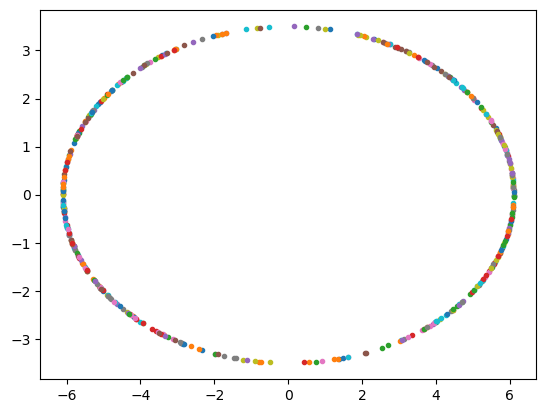

In [100]:
offset_size = 3.5
for i in range(500):
    offset_dec = offset_size * (2 * np.random.rand() - 1)
    sign = 1 if np.random.rand() < 0.5 else -1
    offset_ra = sign * np.sqrt(offset_size ** 2 - offset_dec ** 2) / np.cos(-55 * np.pi/180)
    plt.plot(offset_ra, offset_dec, '.')